General elections were held in Costa Rica on the 6th of February 2022. The president was being chosen in these elections. None of the presidential nominees obtained at least 40% of the votes, therefore, a second round was held on the 3rd of April 2022, between the top two candidates, José María Figueres and Rodrigo Chaves Robles.

In the first round, José María Figueres obtained 27,28% of the votes and Rodrigo Chaves Robles obtained 16,78% of the votes. In the second round, José María Figueres obtained 47,18% of the votes and Rodrigo Chaves Robles obtained 52,82% of the votes, who won the presidency.

https://es.wikipedia.org/wiki/Elecciones_generales_de_Costa_Rica_de_2022

Polls for the first round:

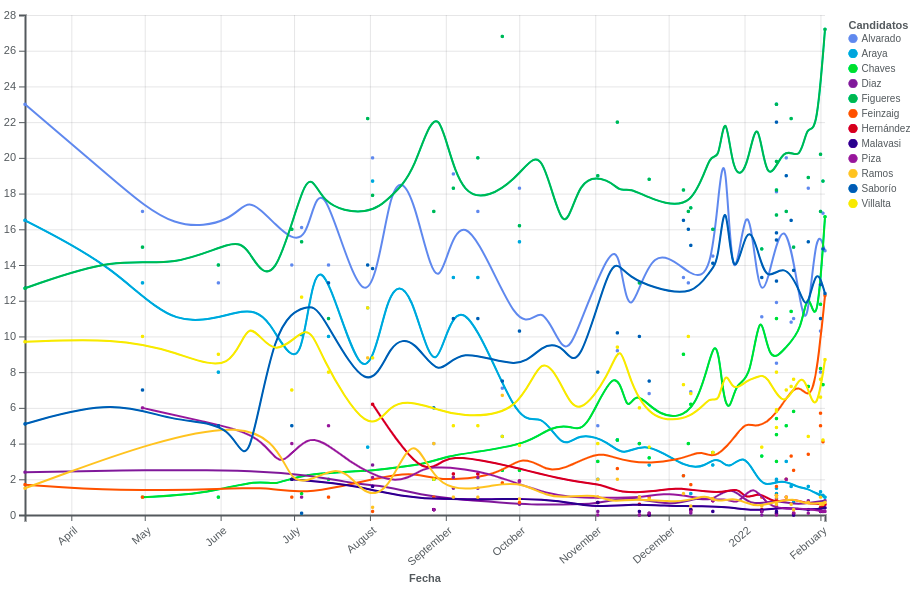

Polls for the second round:

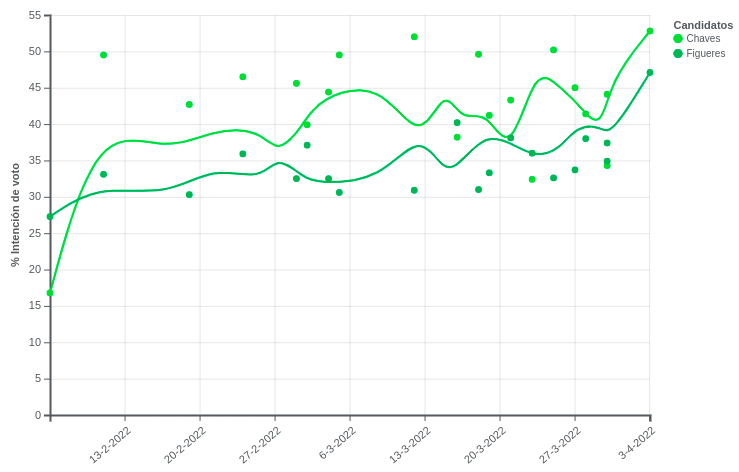

Chaves wasn't a very popular candidate in the beggining, although his vote intention increased exponentially. The polls for the first round didn't place him in the top two most voted candidates until the last moment. After the first round, Chaves rapidly overpassed Figueres as the most voted candidate.

https://es.wikipedia.org/wiki/Anexo:Sondeos_de_las_elecciones_presidenciales_de_Costa_Rica_de_2022

In [ ]:
!pip install pysentimiento

In [ ]:
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def json_to_list(json_file):
  with open(json_file) as f:
    data = json.load(f)
  documents =  []
  for document in data:
    date, time = document["time"].split("T")
    year, month, day = date.split("-")
    try:
      time = time.split(".")[0]
      hour, min, sec = time.split(":")
    except:
      time = time.split("+")[0]
      hor, min, sec = time.split(":")
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(min))
    documents.append((date, document["body"], document["relevance"]))
  return sorted(documents)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FIGUERES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_555_2021-06-30_2022-06-30.json'
CHAVES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_609_2021-06-30_2022-06-30.json'

figueres_documents = json_to_list(FIGUERES_PATH)
chaves_documents = json_to_list(CHAVES_PATH)

In [ ]:
print(f'Figueres: {len(figueres_documents)}')
print(f'Chaves: {len(chaves_documents)}')

Figueres: 67331
Chaves: 105623


In [ ]:
from pysentimiento import create_analyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

In [ ]:
delta_t = 7

José María Figueres

In [ ]:
figueres_dates = []
figueres_texts = []
figueres_relevance = []
for date, text, relevance in figueres_documents:
  figueres_dates.append(date)
  figueres_texts.append(text)
  figueres_relevance.append(relevance)

In [ ]:
figueres_prob_pos = []
figueres_prob_neu = []
figueres_prob_neg = []
figueres_labels = []
outputs = sentiment_analyzer.predict(figueres_texts)
for output in outputs:
  figueres_prob_pos.append(output.probas["POS"])
  figueres_prob_neu.append(output.probas["NEU"])
  figueres_prob_neg.append(output.probas["NEG"])
  figueres_labels.append(output.output)

In [ ]:
figueres_scores = list(np.array(figueres_prob_pos) + 0.5*np.array(figueres_prob_neu)) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
figueres_ponderated_scores = list(np.array(figueres_scores) + np.array(figueres_relevance)*np.array(figueres_scores)) #ponderated_score = score*(1+relevance)

In [ ]:
figueres_reduced_dates = []
figueres_reduced_scores = []
figueres_reduced_ponderated_scores = []
figueres_pos_count = []
figueres_neu_count = []
figueres_neg_count = []
figueres_volumes = []
year0 = figueres_dates[0].year
month0 = figueres_dates[0].month
day0 = figueres_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
date1 = date0 + datetime.timedelta(days=delta_t)
score_ = 0
ponderated_score_ = 0
pos_count_ = 0
neu_count_ = 0
neg_count_ = 0
count_ = 0
for i, date in enumerate(figueres_dates):
  if date < date1:
    score_ += figueres_scores[i]
    ponderated_score_ += figueres_ponderated_scores[i]
    if figueres_labels[i] == 'POS':
      pos_count_ += 1
    elif figueres_labels[i] == 'NEU':
      neu_count_ += 1
    elif figueres_labels[i] == 'NEG':
      neg_count_ += 1
    count_ += 1
  else:
    #add values
    figueres_reduced_dates.append(date0)
    figueres_reduced_scores.append(score_/count_)
    figueres_reduced_ponderated_scores.append(ponderated_score_/count_)
    figueres_pos_count.append(pos_count_)
    figueres_neu_count.append(neu_count_)
    figueres_neg_count.append(neg_count_)
    figueres_volumes.append(count_)
    #reset parameters
    date0 = date1
    date1 = date0 + datetime.timedelta(days=delta_t)
    score_ = figueres_scores[i]
    ponderated_score_ = figueres_ponderated_scores[i]
    pos_count_ = neu_count_ = neg_count_ = 0
    if figueres_labels[i] == 'POS':
      pos_count_ += 1
    elif figueres_labels[i] == 'NEU':
      neu_count_ += 1
    elif figueres_labels[i] == 'NEG':
      neg_count_ += 1
    count_ = 1
#final addition
figueres_reduced_dates.append(date0)
figueres_reduced_scores.append(score_/count_)
figueres_reduced_ponderated_scores.append(ponderated_score_/count_)
figueres_pos_count.append(pos_count_)
figueres_neu_count.append(neu_count_)
figueres_neg_count.append(neg_count_)
figueres_volumes.append(count_)

In [ ]:
assert sum(figueres_pos_count) + sum(figueres_neu_count) + sum(figueres_neg_count) == sum(figueres_volumes), "Should be equal"

In [ ]:
colors = ['springgreen', 'lightslategrey', 'tomato']

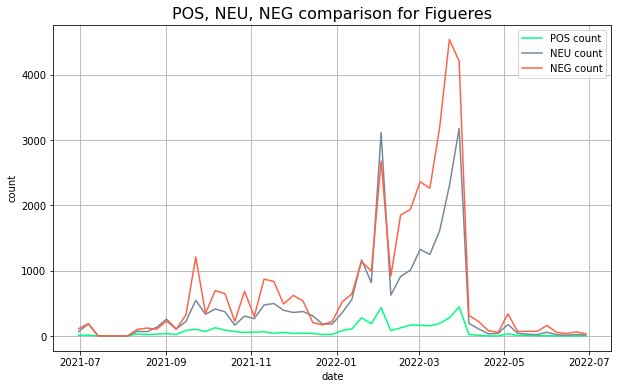

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(figueres_reduced_dates, figueres_pos_count, color=colors[0])
ax.plot(figueres_reduced_dates, figueres_neu_count, color=colors[1])
ax.plot(figueres_reduced_dates, figueres_neg_count, color=colors[2])
ax.set_title("POS, NEU, NEG comparison for Figueres", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("count")
plt.legend(["POS count", "NEU count", "NEG count"])
plt.grid()
plt.show()

In [ ]:
figueres_pos_perc = np.array(figueres_pos_count)/np.array(figueres_volumes)
figueres_neu_perc = np.array(figueres_neu_count)/np.array(figueres_volumes)
figueres_neg_perc = np.array(figueres_neg_count)/np.array(figueres_volumes)

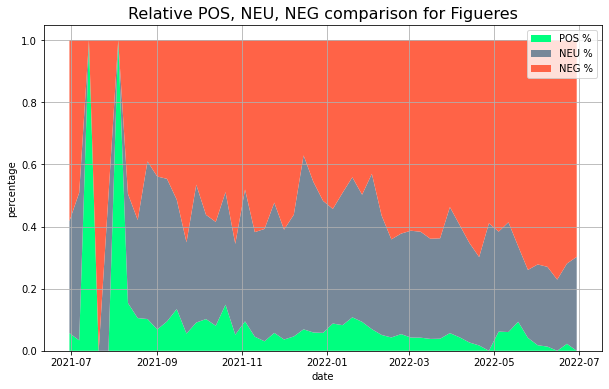

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.set_title("Relative POS, NEU, NEG comparison for Figueres", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("percentage")
ax.stackplot(figueres_reduced_dates, figueres_pos_perc, figueres_neu_perc, figueres_neg_perc, colors=colors)
plt.legend(["POS %", "NEU %", "NEG %"])
plt.grid()
plt.show()

During the months of July and August there is a very low volume, therefore, the pics in the percentage of positive comments shouldn't be taken into account. From the month of September there is a downtrend in the percentage of positive comments and an uptrend in the percentage of negative comments.

Rodrigo Chaves Robles

In [ ]:
chaves_dates = []
chaves_texts = []
chaves_relevance = []
for date, text, relevance in chaves_documents:
  chaves_dates.append(date)
  chaves_texts.append(text)
  chaves_relevance.append(relevance)

In [ ]:
chaves_prob_pos = []
chaves_prob_neu = []
chaves_prob_neg = []
chaves_labels = []
outputs = sentiment_analyzer.predict(chaves_texts)
for output in outputs:
  chaves_prob_pos.append(output.probas["POS"])
  chaves_prob_neu.append(output.probas["NEU"])
  chaves_prob_neg.append(output.probas["NEG"])
  chaves_labels.append(output.output)

In [ ]:
chaves_scores = list(np.array(chaves_prob_pos) + 0.5*np.array(chaves_prob_neu)) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
chaves_ponderated_scores = list(np.array(chaves_scores) + np.array(chaves_relevance)*np.array(chaves_scores)) #ponderated_score = score*(1+relevance)

In [ ]:
chaves_reduced_dates = []
chaves_reduced_scores = []
chaves_reduced_ponderated_scores = []
chaves_pos_count = []
chaves_neu_count = []
chaves_neg_count = []
chaves_volumes = []
year0 = chaves_dates[0].year
month0 = chaves_dates[0].month
day0 = chaves_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
date1 = date0 + datetime.timedelta(days=delta_t)
score_ = 0
ponderated_score_ = 0
pos_count_ = 0
neu_count_ = 0
neg_count_ = 0
count_ = 0
for i, date in enumerate(chaves_dates):
  if date < date1:
    score_ += chaves_scores[i]
    ponderated_score_ += chaves_ponderated_scores[i]
    if chaves_labels[i] == 'POS':
      pos_count_ += 1
    elif chaves_labels[i] == 'NEU':
      neu_count_ += 1
    elif chaves_labels[i] == 'NEG':
      neg_count_ += 1
    count_ += 1
  else:
    #add values
    chaves_reduced_dates.append(date0)
    chaves_reduced_scores.append(score_/count_)
    chaves_reduced_ponderated_scores.append(ponderated_score_/count_)
    chaves_pos_count.append(pos_count_)
    chaves_neu_count.append(neu_count_)
    chaves_neg_count.append(neg_count_)
    chaves_volumes.append(count_)
    #reset parameters
    date0 = date1
    date1 = date0 + datetime.timedelta(days=delta_t)
    score_ = chaves_scores[i]
    ponderated_score_ = chaves_ponderated_scores[i]
    pos_count_ = neu_count_ = neg_count_ = 0
    if chaves_labels[i] == 'POS':
      pos_count_ += 1
    elif chaves_labels[i] == 'NEU':
      neu_count_ += 1
    elif chaves_labels[i] == 'NEG':
      neg_count_ += 1
    count_ = 1
#final addition
chaves_reduced_dates.append(date0)
chaves_reduced_scores.append(score_/count_)
chaves_reduced_ponderated_scores.append(ponderated_score_/count_)
chaves_pos_count.append(pos_count_)
chaves_neu_count.append(neu_count_)
chaves_neg_count.append(neg_count_)
chaves_volumes.append(count_)

In [ ]:
assert sum(chaves_pos_count) + sum(chaves_neu_count) + sum(chaves_neg_count) == sum(chaves_volumes), "Should be equivalent"

In [ ]:
colors = ['springgreen', 'lightslategrey', 'tomato']

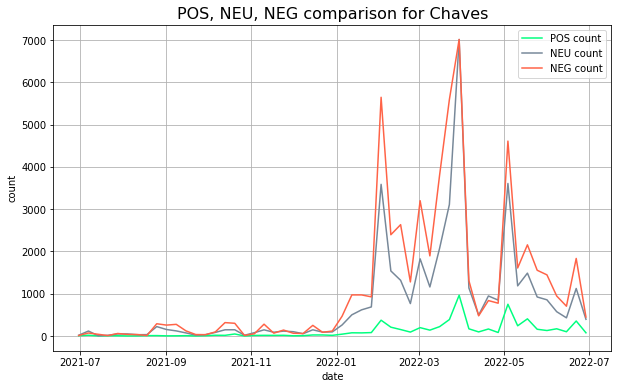

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(chaves_reduced_dates, chaves_pos_count, color=colors[0])
ax.plot(chaves_reduced_dates, chaves_neu_count, color=colors[1])
ax.plot(chaves_reduced_dates, chaves_neg_count, color=colors[2])
ax.set_title("POS, NEU, NEG comparison for Chaves", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("count")
plt.legend(["POS count", "NEU count", "NEG count"])
plt.grid()
plt.show()

In [ ]:
chaves_pos_perc = np.array(chaves_pos_count)/np.array(chaves_volumes)
chaves_neu_perc = np.array(chaves_neu_count)/np.array(chaves_volumes)
chaves_neg_perc = np.array(chaves_neg_count)/np.array(chaves_volumes)

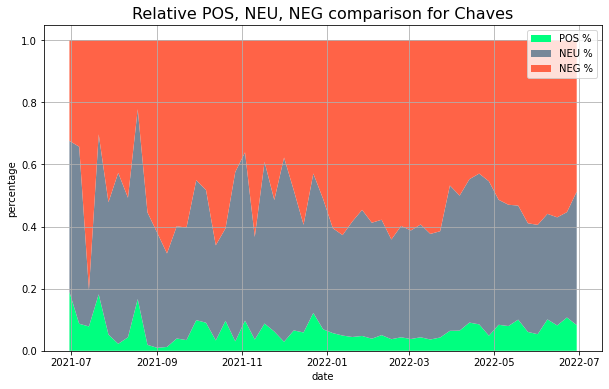

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.set_title("Relative POS, NEU, NEG comparison for Chaves", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("percentage")
ax.stackplot(chaves_reduced_dates, chaves_pos_perc, chaves_neu_perc, chaves_neg_perc, colors=colors)
plt.legend(["POS %", "NEU %", "NEG %"])
plt.grid()
plt.show()

Until the month of January there is a very low volume for Chaves, therefore, the stacked plot should be studied from the month of January. There is a significant decrease in the percentage of negative comments in the month of April. This might be related to Chaves victory in the final round of the presidential elections.

Comparison

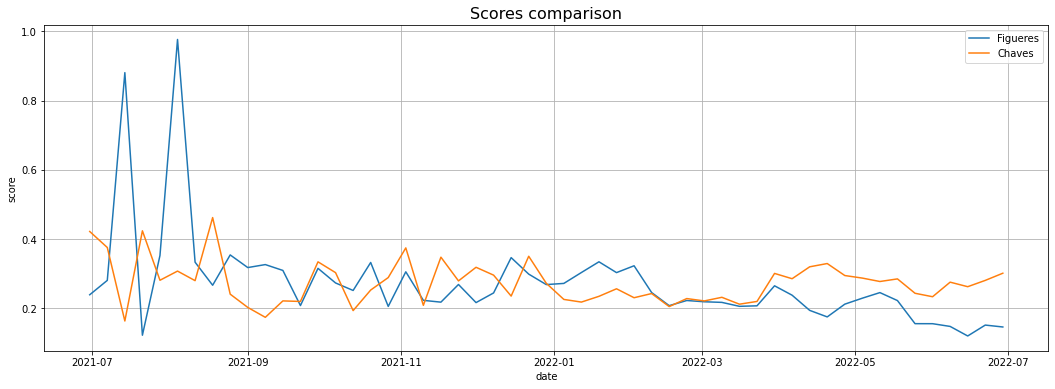

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(figueres_reduced_dates, figueres_reduced_scores, chaves_reduced_dates, chaves_reduced_scores)
ax.set_title("Scores comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("score")
plt.legend(["Figueres", "Chaves"])
plt.grid()
plt.show()

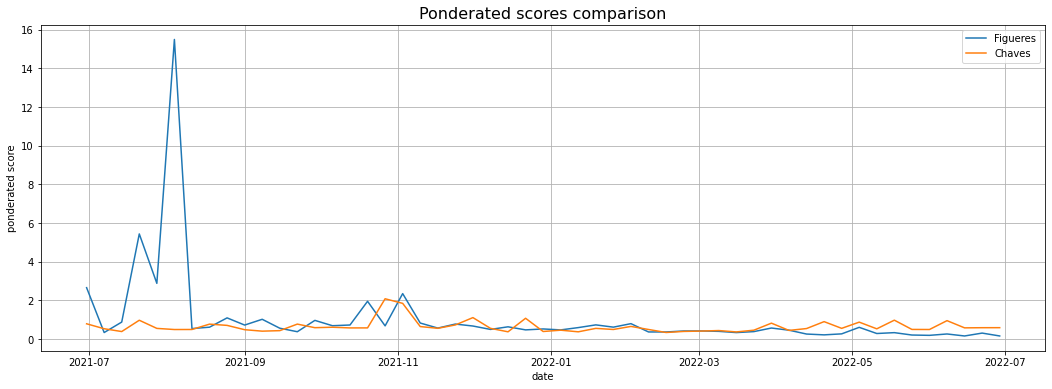

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(figueres_reduced_dates, figueres_reduced_ponderated_scores, chaves_reduced_dates, chaves_reduced_ponderated_scores)
ax.set_title("Ponderated scores comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("ponderated score")
plt.legend(["Figueres", "Chaves"])
plt.grid()
plt.show()

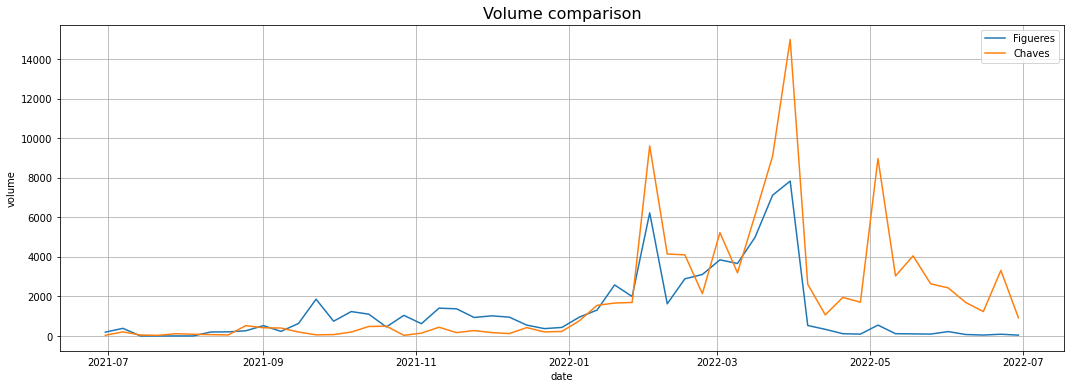

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
ax.plot(figueres_reduced_dates, figueres_volumes, chaves_reduced_dates, chaves_volumes)
ax.set_title("Volume comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("volume")
plt.legend(["Figueres", "Chaves"])
plt.grid()
plt.show()

Both score plots have a strange behavior during the months of July and August, when there is a very low volume for both candidates.

There is a small peak of Figueres' volume at the end of September which seems to be related to a public conflict he had with his sister regarding a heritage. -> https://semanariouniversidad.com/pais/jose-maria-figueres-en-conflicto-con-su-hermana-christiana-por-demanda-para-variar-herencia-familiar/

Let's focus on the elections interval.

In [ ]:
def filter(dates, y_parameter, start_date, end_date):
  filtered_dates = []
  filtered_y = []
  for i, date in enumerate(dates):
    if date > end_date:
      break
    if date >= start_date:    
      filtered_dates.append(date)
      filtered_y.append(y_parameter[i])
  return filtered_dates, filtered_y

In [ ]:
# Start and end date
start_date = datetime.datetime(2022, 1, 15)
end_date = datetime.datetime(2022, 5, 15)

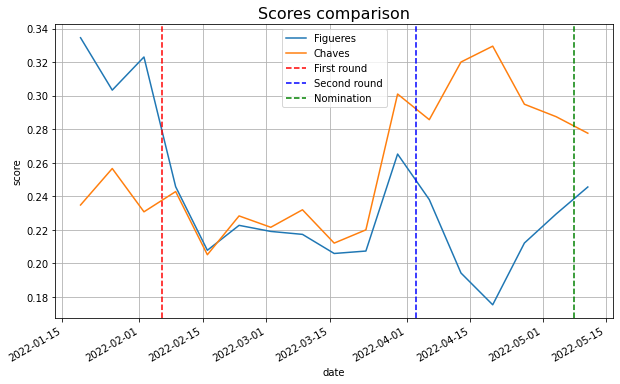

In [ ]:
figueres_filtered_dates, figueres_filtered_scores = filter(figueres_reduced_dates, figueres_reduced_scores, start_date, end_date)
chaves_filtered_dates, chaves_filtered_scores = filter(chaves_reduced_dates, chaves_reduced_scores, start_date, end_date)

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(figueres_filtered_dates, figueres_filtered_scores, label='Figueres')
ax.plot(chaves_filtered_dates, chaves_filtered_scores, label='Chaves')
ax.set_title("Scores comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("score")
fig.autofmt_xdate()
plt.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--', label='First round')
plt.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--', label='Second round')
plt.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--', label='Nomination')
plt.legend()
plt.grid()
plt.show()

Since ends of February, Chaves receives more positive comments than Figueres. This could be related with the fact that Figueres had more votes in the first round, but Chaves won in the second one.

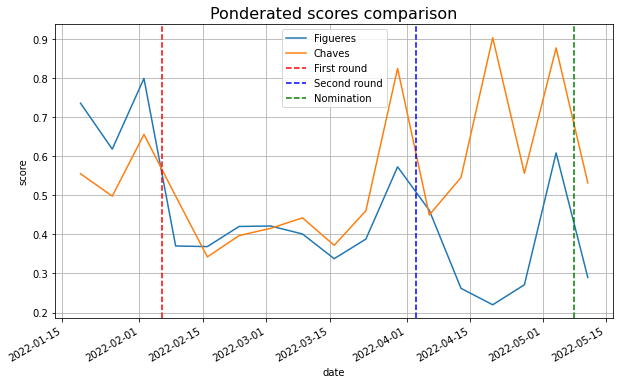

In [ ]:
figueres_filtered_dates, figueres_filtered_ponderated_scores = filter(figueres_reduced_dates, figueres_reduced_ponderated_scores, start_date, end_date)
chaves_filtered_dates, chaves_filtered_ponderated_scores = filter(chaves_reduced_dates, chaves_reduced_ponderated_scores, start_date, end_date)

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(figueres_filtered_dates, figueres_filtered_ponderated_scores, label='Figueres')
ax.plot(chaves_filtered_dates, chaves_filtered_ponderated_scores, label='Chaves')
ax.set_title("Ponderated scores comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("score")
fig.autofmt_xdate()
plt.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--', label='First round')
plt.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--', label='Second round')
plt.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--', label='Nomination')
plt.legend()
plt.grid()
plt.show()

Since beginings of March there is a clear predominance of Chaves in both scores (normal score and ponderated score). The score can be interpreted as an index of popularity. In the first round, there is a clear predominance of Figueres in the first graph, where Figueres won. In the second round, Chaves has already surpassed Figueres, with a clear predominance in the first graph, where Chaves wins the elections. The first graph seems more reliable.

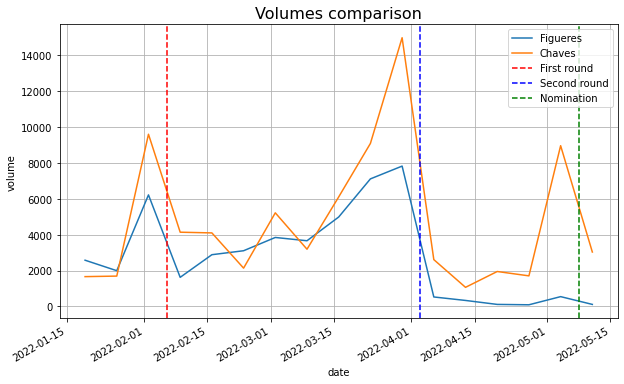

In [ ]:
figueres_filtered_dates, figueres_filtered_volumes = filter(figueres_reduced_dates, figueres_volumes, start_date, end_date)
chaves_filtered_dates, chaves_filtered_volumes = filter(chaves_reduced_dates, chaves_volumes, start_date, end_date)

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(figueres_filtered_dates, figueres_filtered_volumes, label='Figueres')
ax.plot(chaves_filtered_dates, chaves_filtered_volumes, label='Chaves')
ax.set_title("Volumes comparison", fontsize=16)
ax.set_xlabel("date")
ax.set_ylabel("volume")
fig.autofmt_xdate()
plt.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--', label='First round')
plt.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--', label='Second round')
plt.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--', label='Nomination')
plt.legend()
plt.grid()
plt.show()

There are three highlighted peaks of volume for Chaves. These three peaks precede three important events: first elections round, second elections round and the nomination of Chaves as president.

Why are the peaks of volume before the events? Is there any error with the dates?

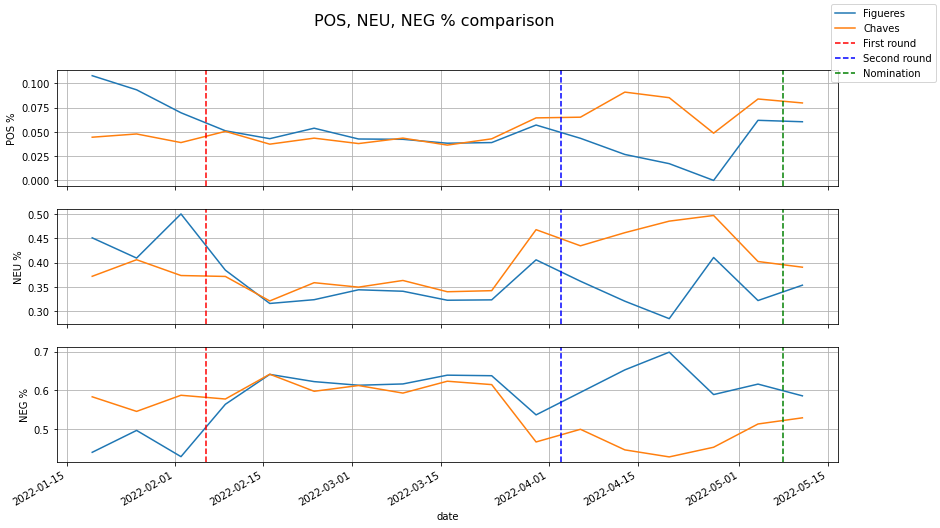

In [ ]:
# Filtered POS
figueres_filtered_dates, figueres_filtered_pos_perc = filter(figueres_reduced_dates, figueres_pos_perc, start_date, end_date)
chaves_filtered_dates, chaves_filtered_pos_perc = filter(chaves_reduced_dates, chaves_pos_perc, start_date, end_date)

# Filtered NEU
figueres_filtered_dates, figueres_filtered_neu_perc = filter(figueres_reduced_dates, figueres_neu_perc, start_date, end_date)
chaves_filtered_dates, chaves_filtered_neu_perc = filter(chaves_reduced_dates, chaves_neu_perc, start_date, end_date)

# Filtered NEG
figueres_filtered_dates, figueres_filtered_neg_perc = filter(figueres_reduced_dates, figueres_neg_perc, start_date, end_date)
chaves_filtered_dates, chaves_filtered_neg_perc = filter(chaves_reduced_dates, chaves_neg_perc, start_date, end_date)

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)
fig.set_size_inches(14, 8)

ax1.plot(figueres_filtered_dates, figueres_filtered_pos_perc, label='Figueres')
ax1.plot(chaves_filtered_dates, chaves_filtered_pos_perc, label='Chaves')
ax1.set_xlabel("date")
ax1.set_ylabel("POS %")
ax1.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--', label='First round')
ax1.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--', label='Second round')
ax1.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--', label='Nomination')
ax1.grid()

ax2.plot(figueres_filtered_dates, figueres_filtered_neu_perc)
ax2.plot(chaves_filtered_dates, chaves_filtered_neu_perc)
ax2.set_xlabel("date")
ax2.set_ylabel("NEU %")
ax2.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--')
ax2.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--')
ax2.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--')
ax2.grid()

ax3.plot(figueres_filtered_dates, figueres_filtered_neg_perc)
ax3.plot(chaves_filtered_dates, chaves_filtered_neg_perc)
ax3.set_xlabel("date")
ax3.set_ylabel("NEG %")
ax3.axvline(x=datetime.datetime(2022, 2, 6), color='red', ls='--')
ax3.axvline(x=datetime.datetime(2022, 4, 3), color='blue', ls='--')
ax3.axvline(x=datetime.datetime(2022, 5, 8), color='green', ls='--')
ax3.grid()

fig.suptitle("POS, NEU, NEG % comparison", fontsize=16)
fig.legend()
fig.autofmt_xdate()
plt.show()

In the first round, Figueres has a higher percentage of positive and neutral comments and Chaves has a higuer percentage of negative comments. In the second round, Chaves has surpassed Figueres in the percentage of positive and neutral comments and Figueres has surpassed Chaves in the percentage of negative comments. This plot clearly indicates how Chaves' popularity surpassed Figueres' popularity within the two election rounds.

In [ ]:
assert all(abs(figueres_pos_perc + figueres_neu_perc + figueres_neg_perc - np.ones(len(figueres_reduced_dates))) < 0.0001), "should be equivalent"

In [ ]:
assert all(abs(chaves_pos_perc + chaves_neu_perc + chaves_neg_perc - np.ones(len(chaves_reduced_dates))) < 0.0001), "Should be equivalent"